In [2]:
from torch.utils.data import TensorDataset
import evaluate
from transformers import Seq2SeqTrainer, DataCollatorForSeq2Seq, AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainingArguments, pipeline
from argparse import ArgumentParser
import torch
from torch import cuda
import numpy as np
from datasets import load_dataset, DownloadMode

In [3]:
parser = ArgumentParser()
parser.add_argument("--seed", default=42)
parser.add_argument("--model_name", default='facebook/bart-base')
parser.add_argument("--dataset_dir", default="modified_dataset/")
parser.add_argument("--reset_cache", action='store_true')
parser.add_argument("--device", default='cuda' if cuda.is_available() else 'cpu')
parser.add_argument("--output_dir", default="./seq_to_seq", help="The output directory")
parser.add_argument("--overwrite_output_dir", default=True, help=" overwrite the content of the output directory")
parser.add_argument("--num_train_epochs", default=3)  # number of training epochs
parser.add_argument("--per_device_train_batch_size", default=32)  # batch size for training
parser.add_argument("--per_device_eval_batch_size", default=64)  # batch size for evaluation
parser.add_argument("--eval_steps", default=400)  # Number of update steps between two evaluations.
parser.add_argument("--save_steps", default=800)  # after # steps model is saved
parser.add_argument("--warmup_steps", default=500)  # number of warmup steps for learning rate scheduler
parser.add_argument("--prediction_loss_only", default=True)
args = parser.parse_args(args=[])

In [ ]:
!python3 gpt_finetune.py parameters.json

In [ ]:
!python gpt_finetune.py \
    --model_name_or_path gpt2 \
    --dataset_name wikitext \
    --dataset_config_name wikitext-2-raw-v1 \
    --per_device_train_batch_size 8 \
    --per_device_eval_batch_size 8 \
    --do_train \
    --do_eval \
    --output_dir /tmp/test-clm

In [ ]:
!python3 gpt_finetune.py --help

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer, set_seed

model_name_or_path="./tmp/test-clm/checkpoint-1000"
#model_name_or_path='gpt2'
device='cuda'
set_seed(10)

model = AutoModelForCausalLM.from_pretrained(model_name_or_path)
model.to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
input_ids = tokenizer.encode("Answer this question: Of which color is the black horse? The color of the horse is", return_tensors="pt")
generations = model.generate(input_ids=input_ids.to(device), do_sample=True, num_return_sequences=1, max_new_tokens=100)
for gen in generations:
    new_text = tokenizer.decode(gen)
    print(new_text)

OSError: Can't load the configuration of './tmp/test-clm/checkpoint-1000'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure './tmp/test-clm/checkpoint-1000' is the correct path to a directory containing a config.json file

In [ ]:
!python3 gpt_finetune.py parameters.json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Total number of items 1331113
old size (1076880, 3), after removing None new size (956451, 3)
old size (152209, 3), after removing None new size (137281, 3)
old size (102024, 3), after removing None new size (88849, 3)
Total number of items after removing none 1182581
train


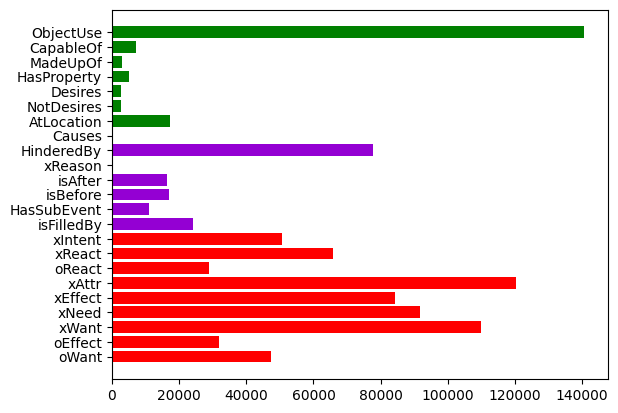

test


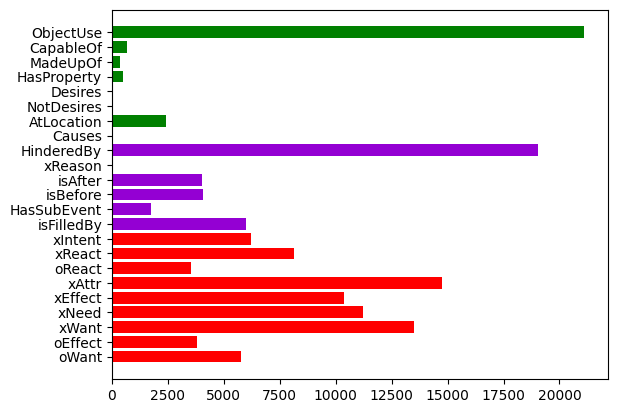

dev


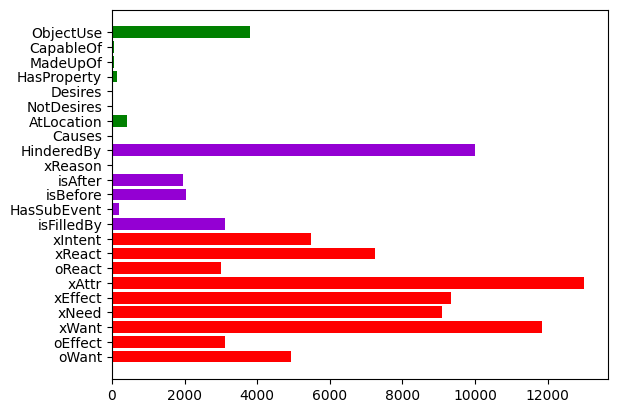

In [52]:
%load_ext autoreload
%autoreload 2
from dataset_utils import main
main()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Total number of items 1331113
Total number of items after removing none 1331113
train


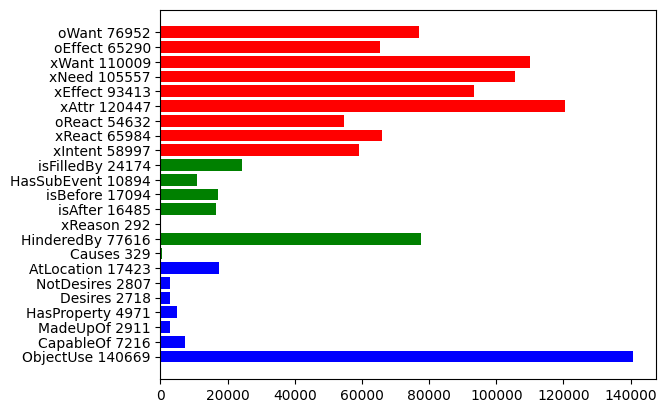

test


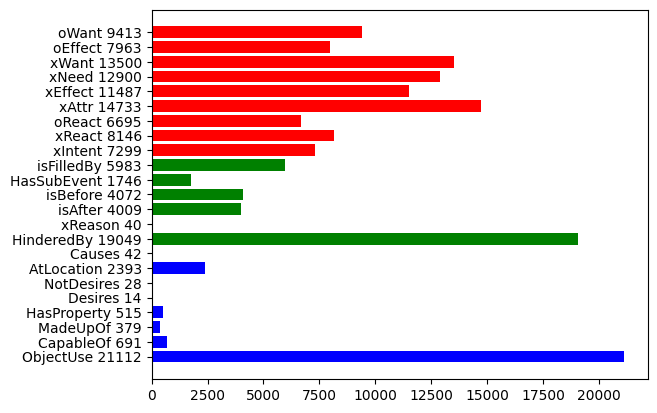

dev


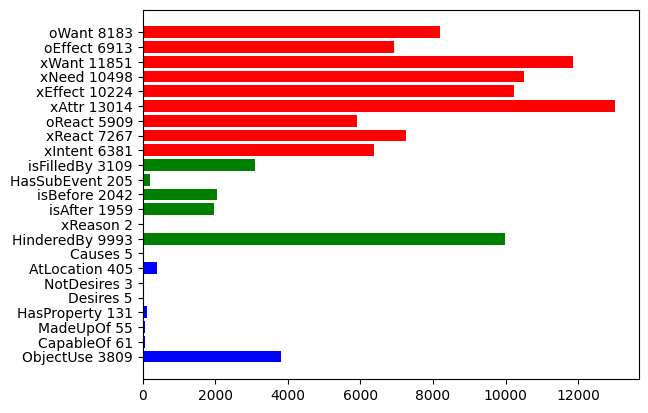

In [37]:
%load_ext autoreload
%autoreload 2
from dataset_utils import main
main()

In [6]:
!pip install ipywidgets

     -------------------------------------- 134.4/134.4 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 384.1/384.1 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
tokenizer('This is awesome')

NameError: name 'tokenizer' is not defined